In [1]:

from easydict import EasyDict as edict
import os

opt = edict({'savingroot':'../result','dataset':'VGG-FACE', 'nc':3,'num_epoches':160,'p1':1.0,'p2':0.1})
print(opt)


    
def load_result(p1,p2):
    dataset_root = opt.dataset +'/'+ opt.dataset + '_' + str(p2)
    f = open(os.path.join(opt.savingroot,dataset_root,str(p1 * 100) + '%complementary/'  + 'acc.txt'), 'r')
    f_f = f.readlines()
    acc = []
    for line in f_f:
       acc.append(float(line.strip('\n')))
    f.close()
    
    f = open(os.path.join(opt.savingroot,dataset_root,str(p1 * 100) + '%complementary/' + 'acc_f_train.txt'), 'r')
    f_f = f.readlines()
    acc_f = []
    for line in f_f:
       acc_f.append(float(line.strip('\n')))
    f.close()
    return acc,acc_f

acc,acc_f = load_result(1.0,0.1)
# print(acc)
# print(acc_f)



{'savingroot': '../result', 'dataset': 'VGG-FACE', 'nc': 3, 'num_epoches': 160, 'p1': 1.0, 'p2': 0.1}


In [2]:
p1_all=[0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0]
p1_all_reverse = [1.0,0.9,0.8,0.7,0.6,0.5,0.4,0.3,0.2,0.1,0.0]
p2_all=[0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0]


    

In [3]:
#load complementary accuracy which change with the proportion of ground truth label
p2 = 1.0
acc_c = []
acc_c_f = []
for p1 in p1_all_reverse:
    try:
        acc_c.append(load_result(p1,p2)[0][-1])
        acc_c_f.append(load_result(p1,p2)[1][-1])
    except:
        acc_c.append(None)
        acc_c_f.append(None)
print(acc_c)
print(acc_c_f)
acc0=acc_c
acc_f0 = acc_c_f

[0.8831417624521073, 0.8237547892720306, 0.8936781609195402, 0.904488232074439, 0.9094143404488232, None, 0.9151614668856048, 0.9073617952928298, 0.9091406677613574, 0.8804050355774494, 0.9152983032293377]
[0.8717843459222769, 0.3169129720853859, 0.49233716475095785, 0.7318007662835249, 0.7197591680350302, None, 0.8416803503010399, 0.8578270388615217, 0.873015873015873, 0.8905309250136836, 0.9107827038861521]


In [4]:
#load complementary accuracy which change with the proportion of unlabel label
p1 =1.0
acc_c = []
acc_c_f = []
for p2 in p2_all:
    if p2==0:
        acc_c.append(None)
        acc_c_f.append(None)
    else:
        acc_c.append(load_result(p1,p2)[0][-1])
        acc_c_f.append(load_result(p1,p2)[1][-1])
            
    
print(acc_c)
print(acc_c_f)
acc1=acc_c
acc_f1 = acc_c_f

[None, 0.10659551176792556, 0.34, 0.553639846743295, 0.6514778325123153, 0.7229064039408867, 0.7642309797482211, 0.8066502463054187, 0.8482484948002189, 0.8653530377668309, 0.8831417624521073]
[None, 0.11398467432950192, 0.35385878489326766, 0.5781335522714833, 0.6447728516694033, 0.7140120415982485, 0.759168035030104, 0.7740831964969896, 0.8296387520525451, 0.8471538040503558, 0.8717843459222769]


In [5]:
#load ground truth accuracy which change with the total traing ground truth data
p1 =0.0
acc_c = []
acc_c_f = []
for p2 in p2_all:
    try:
        if p2==0:
            acc_c.append(None)
            acc_c_f.append(None)
        else:
            acc_c.append(load_result(p1,p2)[0][-1])
            acc_c_f.append(load_result(p1,p2)[1][-1])
    except:
        acc_c.append(None)
        acc_c_f.append(None)
print(acc_c)
print(acc_c_f)
acc2=acc_c
acc_f2 = acc_c_f

[None, 0.42528735632183906, 0.5981116584564861, 0.7141488779419813, 0.7806513409961686, 0.8352490421455939, 0.8503010399562124, 0.8765736179529283, 0.8935413245758074, 0.9100985221674877, 0.9152983032293377]
[None, 0.3794471811713191, 0.5573344280240832, 0.6418992884510126, 0.7183908045977011, 0.7676518883415435, 0.7987137383689108, 0.8333333333333334, 0.8828680897646415, 0.8925834701696771, 0.9107827038861521]


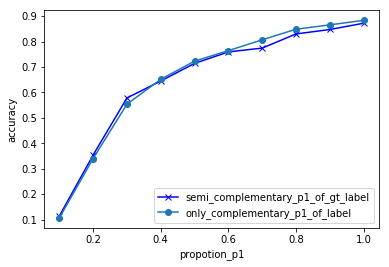

In [16]:
import matplotlib.pyplot as plt
beingsaved = plt.figure()
plt.plot(p2_all,acc_f1,'xb-',label='semi_complementary_p1_of_gt_label')
plt.plot(p2_all,acc1,'o-',label='only_complementary_p1_of_label')
# plt.plot(p2_all,acc0,'*-',label='mix_complementary_p_of_oridnary_label')
# plt.plot(p2_all,acc2,'*--',label='only_oridnary_label_p_of_gt_label')
plt.ylabel('accuracy')
plt.xlabel('propotion_p1')
plt.legend()
# plt.show()
beingsaved.savefig(opt.dataset+'p1.eps', format='eps', dpi=1000)

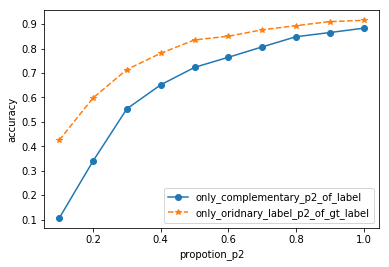

In [17]:
import matplotlib.pyplot as plt
beingsaved = plt.figure()
# plt.plot(p2_all,acc_f1,'xb-',label='semi_complementary_p_of_gt_label')
plt.plot(p2_all,acc1,'o-',label='only_complementary_p2_of_label')
# plt.plot(p2_all,acc0,'*-',label='mix_complementary_p_of_oridnary_label')
plt.plot(p2_all,acc2,'*--',label='only_oridnary_label_p2_of_gt_label')
plt.ylabel('accuracy')
plt.xlabel('propotion_p2')
plt.legend()
# plt.show()
beingsaved.savefig(opt.dataset+'p2.eps', format='eps', dpi=1000)